# Load Data:

In [105]:
# Libraries required 
import sqlite3
import pandas as pd
import numpy as np

In [2]:
# Read sqlite query results into a pandas DataFrame
sql_conn = sqlite3.connect("sqlite.db")
exec_df = pd.read_sql_query("SELECT * from exec", sql_conn)
sql_conn.close()

In [3]:
exec_df.head()

,ts,exe,pid,ppid,path,docker,depth,rates
0,0.690,sh,28531,1158,/bin/sh,None,-1,"{""1"": 1.0, ""5"": 0.2}"
1,0.696,lpstat,28532,28531,/usr/bin/lpstat,None,-1,"{""1"": 2.0, ""5"": 0.4}"
2,0.701,sed,28533,28531,/bin/sed,None,-1,"{""1"": 3.0, ""5"": 0.6}"
3,1.704,sh,28534,1158,/bin/sh,None,-1,"{""1"": 1.0, ""5"": 0.8}"
4,1.711,sed,28536,28534,sed,None,-1,"{""1"": 2.0, ""5"": 1.0}"


We need to split the json in rate column into two seperate columns, 'rate1s' and 'rate5s'.
    1. Use rates column to create a dataframe of 2 columns 'rate1s', 'rate5s'.
    2. Concat the dataframe from step 1 with exec_df to get the final clean dtaframe.

In [5]:
# Split rates column into two columns
rates_df = exec_df['rates'].apply(lambda x : dict(eval(x)) ).apply(pd.Series)
rates_df.columns = ['rate1s', 'rate5s']
# Concat this with exec_df to get the entire dataset
exec_df_clean = pd.concat([exec_df, rates_df], axis=1)

In [8]:
exec_df_clean.head()

,ts,exe,pid,ppid,path,docker,depth,rates,rate1s,rate5s
0,0.690,sh,28531,1158,/bin/sh,None,-1,"{""1"": 1.0, ""5"": 0.2}",1.0,0.2
1,0.696,lpstat,28532,28531,/usr/bin/lpstat,None,-1,"{""1"": 2.0, ""5"": 0.4}",2.0,0.4
2,0.701,sed,28533,28531,/bin/sed,None,-1,"{""1"": 3.0, ""5"": 0.6}",3.0,0.6
3,1.704,sh,28534,1158,/bin/sh,None,-1,"{""1"": 1.0, ""5"": 0.8}",1.0,0.8
4,1.711,sed,28536,28534,sed,None,-1,"{""1"": 2.0, ""5"": 1.0}",2.0,1.0


In [9]:
# Read sqlite query results into a pandas DataFrame
sql_conn = sqlite3.connect("sqlite.db")
tcp_df = pd.read_sql_query("SELECT * from tcplife", sql_conn)
sql_conn.close()

In [10]:
tcp_df.head()

,ts,pid,lport,rport,rx,tx,dur,histotimes,histosizes,histoports,docker,prediction,predquality
0,25.147065,28668,60290,80,30,0,93.65,"[[0, 0, 1, 0, 0], 93.65, 93.65]","[[0, 0, 1, 0, 0], 30, 30]","[[""22"", ""80"", ""443"", ""other""], {""443"": 0, ""80""...",/docker/6aebd9a7d81f55435baff1afbcc16b11362669...,-11.362980,1
1,25.536215,28669,47054,80,166,0,192.11,"[[1, 0, 0, 0, 1], 93.65, 192.11]","[[1, 0, 0, 0, 1], 30, 166]","[[""22"", ""80"", ""443"", ""other""], {""443"": 0, ""80""...",/docker/6aebd9a7d81f55435baff1afbcc16b11362669...,-14.629130,1
2,26.039532,28673,53762,80,0,0,81.72,"[[2, 0, 0, 0, 1], 81.72, 192.11]","[[2, 0, 0, 0, 1], 0, 166]","[[""22"", ""80"", ""443"", ""other""], {""443"": 0, ""80""...",/docker/6aebd9a7d81f55435baff1afbcc16b11362669...,-10.452350,1
3,26.201396,28673,50248,80,0,0,25.16,"[[1, 1, 1, 0, 1], 25.16, 192.11]","[[3, 0, 0, 0, 1], 0, 166]","[[""22"", ""80"", ""443"", ""other""], {""443"": 0, ""80""...",/docker/6aebd9a7d81f55435baff1afbcc16b11362669...,-10.414340,1
4,26.329412,28673,57968,443,0,0,17.78,"[[2, 1, 1, 0, 1], 17.78, 192.11]","[[4, 0, 0, 0, 1], 0, 166]","[[""22"", ""80"", ""443"", ""other""], {""443"": 1, ""80""...",/docker/6aebd9a7d81f55435baff1afbcc16b11362669...,-23.817379,0


# Data Visualization:
    Write a function to produce the visualization.
   

In [12]:
# Libraries required for visualization
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [50]:
def display_plot_hist(input_df, x, y, x_lim=0, y_lim=0):
    """
    Function to display a scatter plot and histogram given a dataframe and the corresponding X and Y axis
    
    @Param:
        input_df: the input dataframe
        x: the name of the column to be considered the x axis
        y: the name of the column to be considered the y axis
           , also the column for which we produce a histogram
        x_lim: the x axis limits, pass as list (optional)
        y_lim: the y axis limit, pass as list (optional)
    
    @Return:
        None
    """
    # Display Scatter plot
    plt.figure()
    sns.lmplot(x, y, data=input_df, fit_reg=False, size=4, aspect=4)
    if x_lim != 0:
        plt.xlim(x_lim)  
        plt.ylim(y_lim) 
    # Histogram
    plt.figure()
    sns.distplot(input_df[y], kde=True, rug=True)

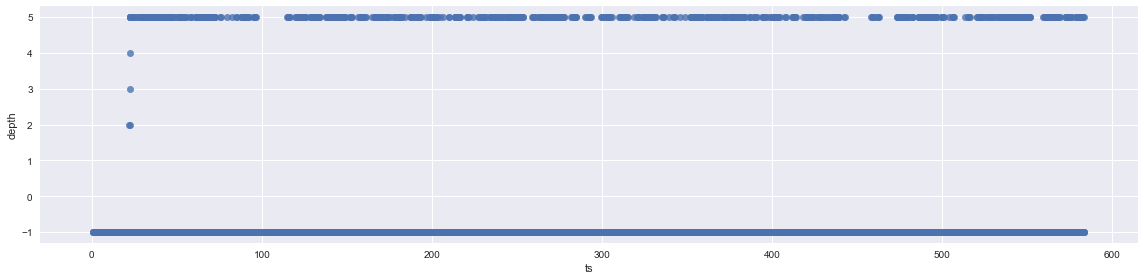

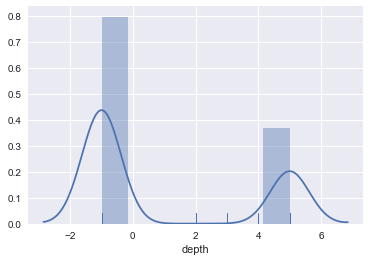

In [51]:
display_plot_hist(input_df=exec_df_clean, x='ts', y='depth')

In [23]:
exec_df_clean['depth'].value_counts()

-1    1709
 5     790
 2       2
 3       1
 4       1
Name: depth, dtype: int64

If we assume that '-1' is a default value. We can remove this '-1' and then plot the 'depth' column.

In [31]:
exec_df_clean['docker'].value_counts()

/docker/6aebd9a7d81f55435baff1afbcc16b11362669d035cdd435199b354ab1924041    787
Name: docker, dtype: int64

In [30]:
# Exploring the data to check for signs of -1 being a default value
exec_df_clean[exec_df_clean.depth == -1]['docker'].value_counts()

Series([], Name: docker, dtype: int64)

Seems like our assumption may have some evidence to it.

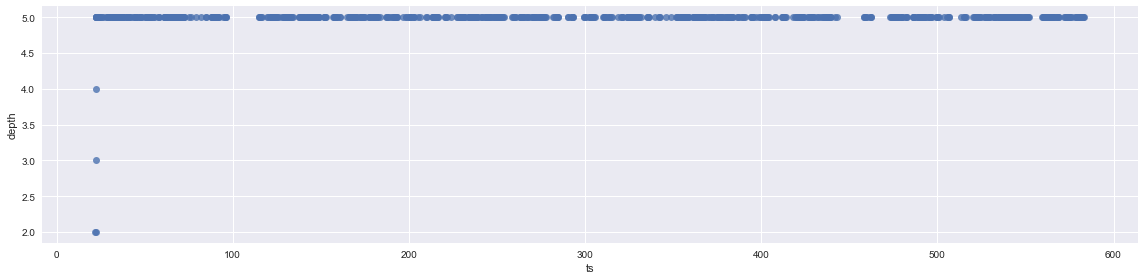

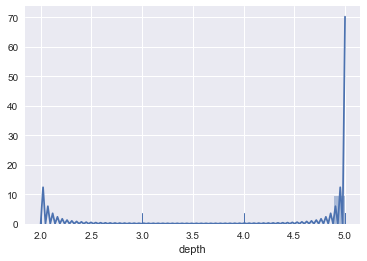

In [53]:
display_plot_hist(input_df=exec_df_clean[exec_df_clean.depth != -1 ], x='ts', y='depth')

If our assumption that '-1' is a default value is true then we can visually see that the values of 2, 3 and 4 for the 'depth' column are outliers.

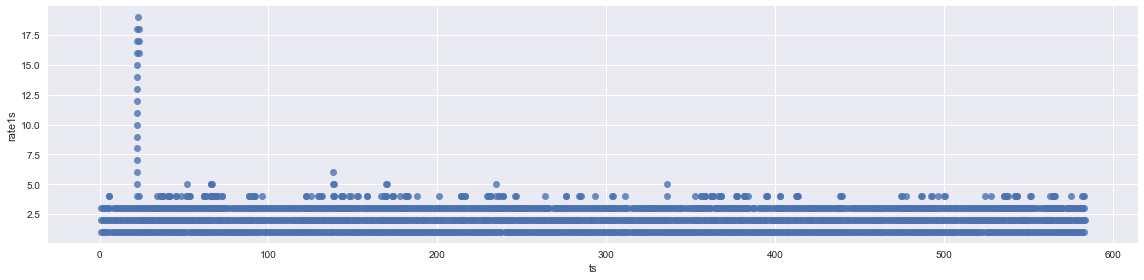

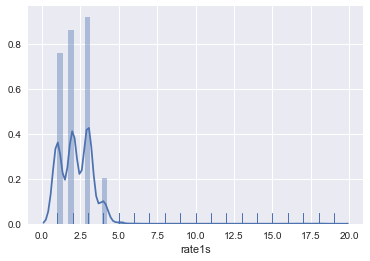

In [54]:
display_plot_hist(input_df=exec_df_clean, x='ts', y='rate1s')

In [55]:
exec_df_clean['rate1s'].value_counts()

3.0     830
2.0     775
1.0     686
4.0     183
5.0      11
17.0      2
16.0      2
6.0       2
18.0      2
8.0       1
7.0       1
19.0      1
9.0       1
11.0      1
12.0      1
13.0      1
14.0      1
15.0      1
10.0      1
Name: rate1s, dtype: int64

Lets assume any value > 5.0 is an outlier

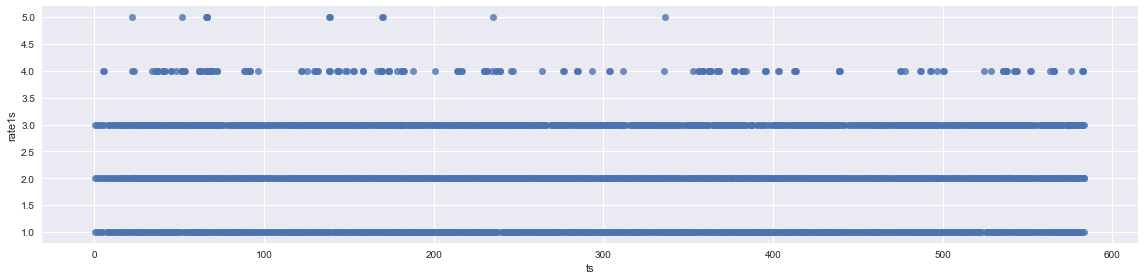

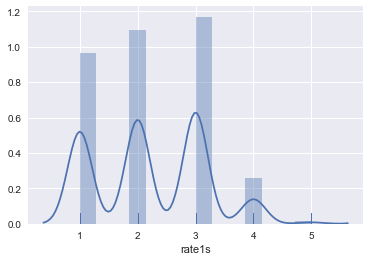

In [56]:
display_plot_hist(input_df=exec_df_clean[exec_df_clean.rate1s <= 5.0], x='ts', y='rate1s')

In [36]:
exec_clean['docker'].value_counts()

/docker/6aebd9a7d81f55435baff1afbcc16b11362669d035cdd435199b354ab1924041    787
Name: docker, dtype: int64

In [59]:
exec_clean['rate1s'].value_counts()

3.0     830
2.0     775
1.0     686
4.0     183
5.0      11
17.0      2
16.0      2
6.0       2
18.0      2
8.0       1
7.0       1
19.0      1
9.0       1
11.0      1
12.0      1
13.0      1
14.0      1
15.0      1
10.0      1
Name: rate1s, dtype: int64

In [43]:
exec_clean[(exec_clean.rate1s > 5)]['docker'].value_counts()

Series([], Name: docker, dtype: int64)

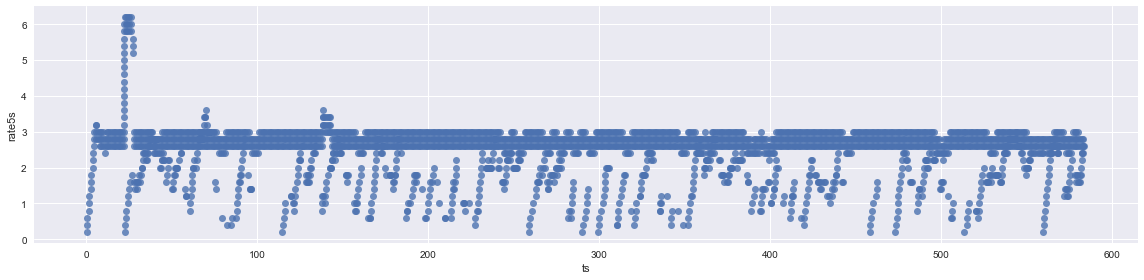

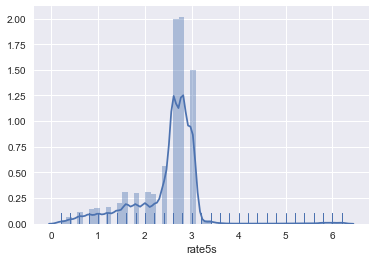

In [58]:
display_plot_hist(input_df=exec_df_clean, x='ts', y='rate5s')

In [60]:
exec_clean['rate5s'].value_counts()

2.8    606
2.6    598
3.0    451
2.4    170
2.0     93
1.6     92
1.8     89
2.2     86
1.4     60
1.2     50
1.0     47
0.8     44
0.6     35
0.4     20
3.2     11
0.2     10
3.4     10
6.2      5
5.8      5
6.0      5
3.6      3
5.2      2
5.4      2
5.6      2
4.2      1
4.6      1
4.4      1
3.8      1
5.0      1
4.0      1
4.8      1
Name: rate5s, dtype: int64

In [88]:
exec_clean[(exec_clean.rate5s > 3.6 )]['docker'].value_counts()

Series([], Name: docker, dtype: int64)

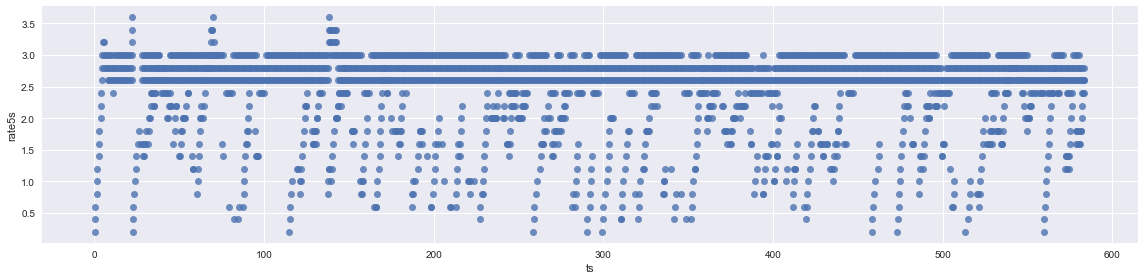

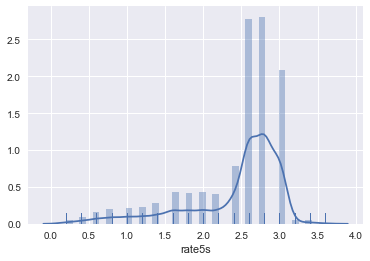

In [91]:
display_plot_hist(input_df=exec_df_clean[exec_df_clean.rate5s <= 3.6], x='ts', y='rate5s')

## TCP Visualization

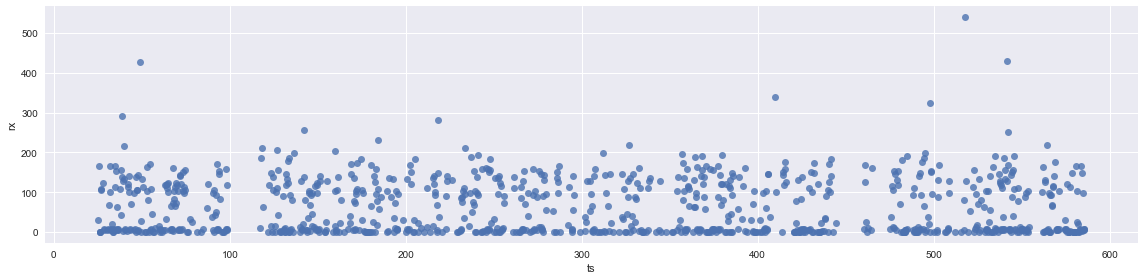

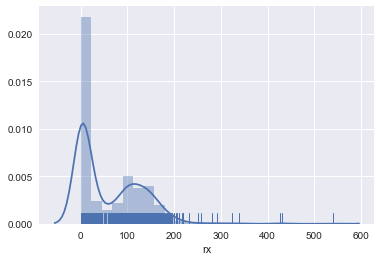

In [92]:
display_plot_hist(input_df=tcp_df, x='ts', y='rx')

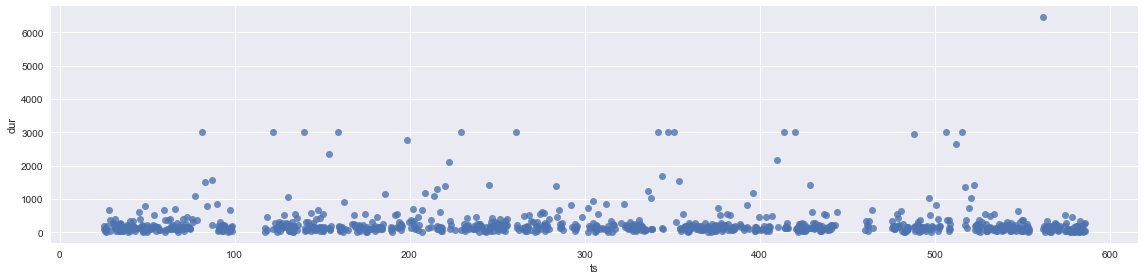

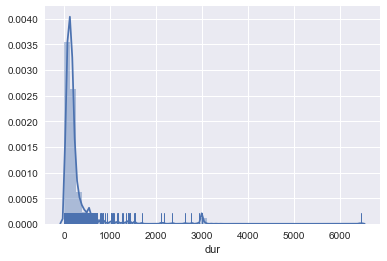

In [107]:
display_plot_hist(input_df=tcp_df, x='ts', y='dur')

# Data Statistics:

In [101]:
from scipy.stats.mstats import mode
def get_descriptive_stats(input_df, column):
    """
    Function to print the descriptive statics of a give dataframe
    
    @Params:
        input_df: the input data frame which contains a column whose descriptive statics is to be calculated
        column: the name of the column whose descriptive statics is to be calculated.
        
    @Returns:
        desc_stat: a dictionary with the descriptive statistics
    """
    KEY_ORDER = ['count', 'min', 'max', 'mean', 'median','mode', 'std', 'variance', '25%', '50%', '75%', 'NaN_perc']
    desc_stat = {}
    desc_stat = input_df[column].describe().to_dict()
    desc_stat['variance'] = input_df[column].var()
    desc_stat['median'] = input_df[column].median()
    desc_stat['mode'] = mode(input_df[column])[0][0]
    desc_stat['NaN_perc'] = str(input_df[column].isnull().sum() / desc_stat['count']) + '%'
    print('---------------------DESCRIPTIVE STATICS---------------------')
    for key in KEY_ORDER:
        print(key +': '+str(desc_stat[key]) )
    print('-------------------------------------------------------------')
    return desc_stat

In [102]:
desc_stat = get_descriptive_stats(tcp_df, 'dur')

---------------------DESCRIPTIVE STATICS---------------------
count: 944.0
min: 5.04
max: 6454.02
mean: 261.219120763
median: 144.64999999999998
mode: 50.92
std: 479.331879478
variance: 229759.05068374358
25%: 85.5125
50%: 144.65
75%: 226.7975
NaN_perc: 0.0%
-------------------------------------------------------------


# Outlier Detection:
    We can use the Modified Z-score method.
    reference:
         1. https://colingorrie.github.io/outlier-detection.html
         2. http://www.itl.nist.gov/div898/handbook/eda/section3/eda35h.htm
         3. http://www.itl.nist.gov/div898/handbook/eda/section3/eda356.htm#MAD

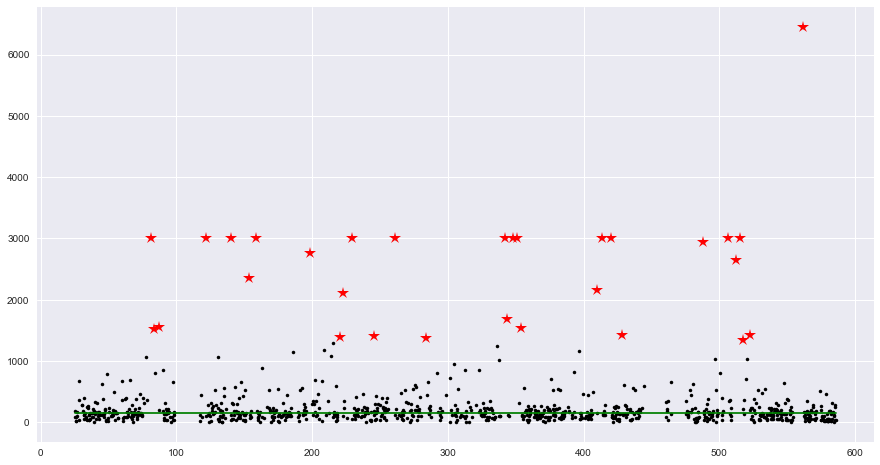

In [104]:
threshold = 3.5
od_df = tcp_df
od_df['median'] = od_df['dur'].median()
od_df['mean_abs_deviation'] = od_df['dur'].mad()
od_df['modified_z_scores'] = 0.6745 * (od_df['dur'] - od_df['median']) / od_df['mean_abs_deviation']
od_df['mad_anomalies'] = 0
od_df['mad_anomalies'] = [1 if abs(x) > threshold else 0 for x in od_df['modified_z_scores']]
od_df['mad_anomalies'].value_counts()
ts_anomaly = od_df[od_df.mad_anomalies == 1]['ts']
dur_anomaly = od_df[od_df.mad_anomalies == 1]['dur']
plt.figure(figsize=(15, 8))
plt.plot(od_df['ts'], od_df['dur'], "k.")
plt.plot(od_df['ts'], od_df['median'], color='green')
plt.plot(ts_anomaly, dur_anomaly, "r*", markersize=12)

Modified Z score with moving window

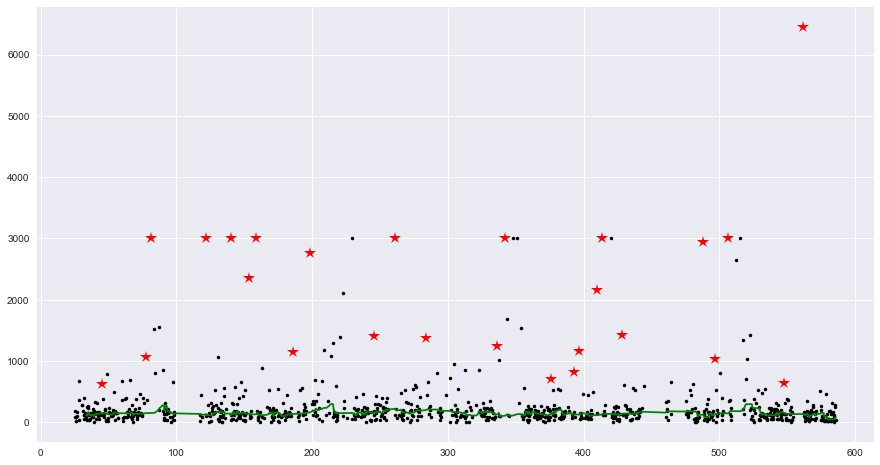

In [106]:
threshold = 3.5
win_size = 20
mad = lambda x: np.fabs(x - x.mean()).mean()
od_df_rw = tcp_df
od_df_rw['rolling_median'] =od_df_rw.rolling(window=win_size, on='ts').median()['dur']
od_df_rw['rolling_mad'] = od_df_rw.rolling(window=win_size, on='ts').apply(mad)['dur']
od_df_rw['rolling_modified_z_scores'] = 0.6745 * (od_df_rw['dur'] - od_df_rw['rolling_median']) / od_df_rw['rolling_mad']
od_df_rw['rolling_mad_anomalies'] = [1 if abs(x) > threshold else 0 for x in od_df_rw['rolling_modified_z_scores']]
ts_r_anomaly = od_df_rw[od_df_rw.rolling_mad_anomalies == 1]['ts']
dur_r_anomaly = od_df_rw[od_df_rw.rolling_mad_anomalies == 1]['dur']
od_df_rw[od_df_rw.rolling_modified_z_scores > 2]['rolling_modified_z_scores']
plt.figure(figsize=(15, 8))
plt.plot(od_df_rw['ts'], od_df_rw['dur'], "k.")
plt.plot(od_df_rw['ts'], od_df_rw['rolling_median'], color='green')
#plt.plot(tcp_df['ts'], tcp_df['dur'].mean(), color='blue')
plt.plot(ts_r_anomaly, dur_r_anomaly, "r*", markersize=12)

# Time Series Forecasting:
    1. check for stationarity of the data
    2. predict the next 25 values 

In [117]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
result = adfuller(tcp_df['dur'], autolag='AIC', regression='c')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.252495
p-value: 0.000000
Critical Values:
	5%: -2.865
	10%: -2.568
	1%: -3.437


The p-value is lower than 1%, we can reject the null hypothesis with a significance level of 1% (really low probability that this is a statistical fluke)